# Final Project Part 2 - Exploratory Data Analysis

## 1. Import Python Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
%matplotlib inline

## 2. Load Data to DataFrame

In [4]:
la_airbnbs = pd.read_csv('../data/la_airbnb_retail_listings.csv', low_memory = False)

In [5]:
la_airbnbs.loc[:, 'beds'].value_counts()

1.0     17822
2.0      6856
3.0      3116
4.0      1677
5.0       730
6.0       444
8.0       162
7.0       151
10.0       86
9.0        58
16.0       44
12.0       19
11.0       17
14.0        5
13.0        4
15.0        3
Name: beds, dtype: int64

## 3. Explornig the Dataset

In [6]:
la_airbnbs.shape

(31253, 95)

In [7]:
la_airbnbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 95 columns):
id                                  31253 non-null int64
listing_url                         31253 non-null object
scrape_id                           31253 non-null int64
last_scraped                        31253 non-null object
name                                31246 non-null object
summary                             30417 non-null object
space                               21866 non-null object
description                         31238 non-null object
experiences_offered                 31253 non-null object
neighborhood_overview               18575 non-null object
notes                               13815 non-null object
transit                             18164 non-null object
access                              19074 non-null object
interaction                         18262 non-null object
house_rules                         22047 non-null object
thumbnail_url          

In [8]:
la_airbnbs.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [9]:
la_airbnbs.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

We have 95 columns with 31253 entries.  Many of the columns are repetitive or not helpful information that we can use to build our model.  We'll drop the non useful columns and create a new dataset from the remaining columns. 

In [10]:
cleaned_la_airbnbs = la_airbnbs.drop(['host_has_profile_pic', 'thumbnail_url', 'host_url',
                                      'medium_url', 'picture_url', 'xl_picture_url', 'host_picture_url',
                                     'listing_url', 'weekly_price', 'monthly_price', 'host_thumbnail_url',
                                     'scrape_id', 'latitude', 'longitude', 'host_response_rate', 'requires_license',
                                     'require_guest_profile_picture', 'jurisdiction_names', 'last_scraped', 'summary', 
                                     'description', 'name', 'neighbourhood', 'state', 'country',
                                      'market', 'license', 'first_review', 'last_review', 'calendar_last_scraped',
                                     'neighbourhood_group_cleansed', 'host_about', 'house_rules', 'country_code',
                                     'street', 'transit', 'access', 'space', 'notes', 'interaction',
                                     'smart_location', 'calendar_updated', 'experiences_offered',
                                     'neighborhood_overview', 'host_acceptance_rate', 'host_location',
                                     'host_neighbourhood', 'host_response_time', 'host_name'], axis = 'columns')

In [11]:
cleaned_la_airbnbs.shape

(31253, 46)

In [12]:
cleaned_la_airbnbs.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
     

In [13]:
cleaned_la_airbnbs.isna().sum()

id                                      0
host_id                                 0
host_since                             14
host_is_superhost                      14
host_listings_count                    14
host_total_listings_count              14
host_verifications                      0
host_identity_verified                 14
neighbourhood_cleansed                  0
city                                   11
zipcode                               395
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              97
bedrooms                               35
beds                                   59
bed_type                                0
amenities                               0
square_feet                         30869
price                                   0
security_deposit                    14397
cleaning_fee                      

Convert string 'price' into numerical value float type

In [14]:
# Clean 'price' and convert to numeric value.
cleaned_la_airbnbs.loc[:, 'price'] = cleaned_la_airbnbs.loc[:, 'price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
cleaned_la_airbnbs.loc[:, ['neighbourhood_cleansed', 'city', 'zipcode']].sample(40)

,neighbourhood_cleansed,city,zipcode
672,Arcadia,Arcadia,91007
9813,Gardena,Gardena,90247
4461,Downtown,Los Angeles,90013
4315,Downtown,Los Angeles,90014
20231,Pasadena,Pasadena,91101
11970,Highland Park,Los Angeles,90042
16324,Malibu,Malibu,90265
28427,Walnut,Walnut,91789
3268,Burbank,Burbank,91504
4546,Downtown,Los Angeles,90015


In [16]:
cleaned_la_airbnbs.loc[:, 'zipcode'].value_counts()

90291         1733
90046         1367
90028         1094
90026          980
90036          839
90068          718
90066          690
90027          571
90038          552
90292          530
90025          526
90069          518
90019          512
90048          510
90024          440
90034          432
90265          426
90004          387
90029          372
91748          362
90039          346
90006          344
90012          334
90035          332
91601          327
90802          312
90042          307
90405          299
90017          291
91604          263
              ... 
92397            1
999041           1
91606-1412       1
90630            1
90403-2638       1
92629            1
91764            1
91708            1
92880            1
90034-2203       1
90840            1
90621            1
90036-2514       1
91604-3646       1
91308            1
90929            1
92614            1
93591            1
92821            1
90039-2715       1
93105            1
91523       

After looking at our data we notice that 'neighbourhood_cleansed', 'city', 'zipcode' are all very similar information.  We want to use zipcodes as they are in a numerical format already, but some of that data is missing, entered incorrectly or entered in a different format.  We also notice that 'neighbourhood_cleansed' has no missing fields and is a more specific location that our 'city' column.  

We will now import another dataset that contains a zipcode lookup table for all zipcodes in the United States.  We'll hopefully be able to use 'neighbourhood_cleansed' to cross reference the new zipcode dataset to located our missing or incorrectly entered zipcodes.

In [17]:
zipcodes = pd.read_csv('../data/zips/uszips.csv', low_memory = False)

In [18]:
zipcodes.shape

(33099, 16)

In [19]:
zipcodes.sample(5)

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
13387,41524,37.41796,-82.23106,Fedscreek,KY,Kentucky,True,NaN,384,19.1,21195,Pike,{'21195':100},False,False,America/New_York
3721,13335,42.70267,-75.25046,Edmeston,NY,New York,True,NaN,1590,16.1,36077,Otsego,{'36077':100},False,False,America/New_York
2330,8071,39.73228,-75.13387,Pitman,NJ,New Jersey,True,NaN,9551,1110.5,34015,Gloucester,{'34015':100},False,False,America/New_York
22535,65230,39.28717,-92.69501,Armstrong,MO,Missouri,True,NaN,703,4.0,29089,Howard,"{'29089':91.32,'29175':8.68}",False,False,America/Chicago
5587,17964,40.71416,-76.49706,Pitman,PA,Pennsylvania,True,NaN,798,13.5,42107,Schuylkill,"{'42097':5.39,'42107':94.61}",False,False,America/New_York


In [20]:
zipcodes[(zipcodes.loc[:, 'city'] == 'Hollywood') & (zipcodes.loc[:, 'state_id'] == 'CA')]

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone


In [21]:
zipcodes[(zipcodes.loc[:, 'zip'] == 90028)]

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
30019,90028,34.09989,-118.32692,Los Angeles,CA,California,True,NaN,28714,7273.3,6037,Los Angeles,{'06037':100},False,False,America/Los_Angeles


In [22]:
zipcodes[zipcodes.loc[:, 'city'] == 'Sherman Oaks']

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
30234,91403,34.14659,-118.46286,Sherman Oaks,CA,California,True,NaN,23484,2497.2,6037,Los Angeles,{'06037':100},False,False,America/Los_Angeles
30238,91423,34.14852,-118.43272,Sherman Oaks,CA,California,True,NaN,30991,2742.5,6037,Los Angeles,{'06037':100},False,False,America/Los_Angeles


We will be attempting to fix all invalid entries for 'zipcode', using the other dataset as well as other entries we all aready have.

In [23]:
# Look at each row in our 'cleaned_la_airbnbs' dataset, then look for only rows that have invalid entries for 'zipcode', which we are stating as zipcodes that aren't 5 digits long or NaN.
for zip_index, zip_row in cleaned_la_airbnbs.iterrows():
    if (isinstance(cleaned_la_airbnbs.loc[zip_index, 'zipcode'], str) and len(cleaned_la_airbnbs.loc[zip_index, 'zipcode']) != 5) or (isinstance(cleaned_la_airbnbs.loc[zip_index, 'zipcode'], float)):
        # If we can find a matching zipcode for the 'neighbourhood_cleansed' as a valid 'city' in 'zipcodes' dataset then we'll take that zipcode.
        if len(zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == zip_row['neighbourhood_cleansed'])].index) > 0:
            cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == cleaned_la_airbnbs.loc[zip_index, 'neighbourhood_cleansed'])]['zip'].iloc[0]
        # Otherwise lets search our own 'cleaned_la_airbnbs' dataset for an exisiting listing with a zipcode and use that.
        else:
            for city_index, city_row in cleaned_la_airbnbs.iterrows():
                if zip_row['neighbourhood_cleansed'] == city_row['neighbourhood_cleansed']:
                    cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = city_row['zipcode']
                    break
            # If that still doesn't yeild a valid entry we'll try using 'city' instead of 'neighbourhood_cleansed' as a search parameter.  We do this last because all search results will yeild Los Angeles.
            if len(zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == zip_row['city'])].index) > 0:
                cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == cleaned_la_airbnbs.loc[zip_index, 'city'])]['zip'].iloc[0]

cleaned_la_airbnbs.loc[:, 'zipcode'] = cleaned_la_airbnbs.loc[:, 'zipcode'].astype(int)

#### Create our initial Linear Regression model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

target_col = 'price'
y = cleaned_la_airbnbs.loc[:, target_col]

feature_cols = ['zipcode']
X = cleaned_la_airbnbs.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.0009885884452847105
0.0005802889405541745


Find and replace all missing values in possible feature columns such as bedrooms, beds etc.  Replacing null values with the closest interger of the average of all non null values. Convert and format any additional features we may want to use.

In [25]:
# Clean 'cleaning_fee' and convert to numeric value.
cleaned_la_airbnbs.loc[:, 'cleaning_fee'] = cleaned_la_airbnbs.loc[:, 'cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [26]:
cleaned_la_airbnbs.loc[:, 'cleaning_fee'].dropna().mean()

75.67502780180403

In [27]:
cleaned_la_airbnbs.loc[:, 'bedrooms'].dropna().mean()

1.3501185213658786

In [28]:
cleaned_la_airbnbs.loc[:, 'bedrooms'].fillna(value = 1.0, inplace = True)

In [29]:
cleaned_la_airbnbs.loc[:, 'beds'].dropna().mean()

1.8889850612297236

In [30]:
cleaned_la_airbnbs.loc[:, 'beds'].fillna(value = 2.0, inplace = True)

In [31]:
cleaned_la_airbnbs.loc[:, 'review_scores_rating'].dropna().mean()

94.21453258029166

In [32]:
cleaned_la_airbnbs.loc[:, 'review_scores_rating'].isna().sum()

7527

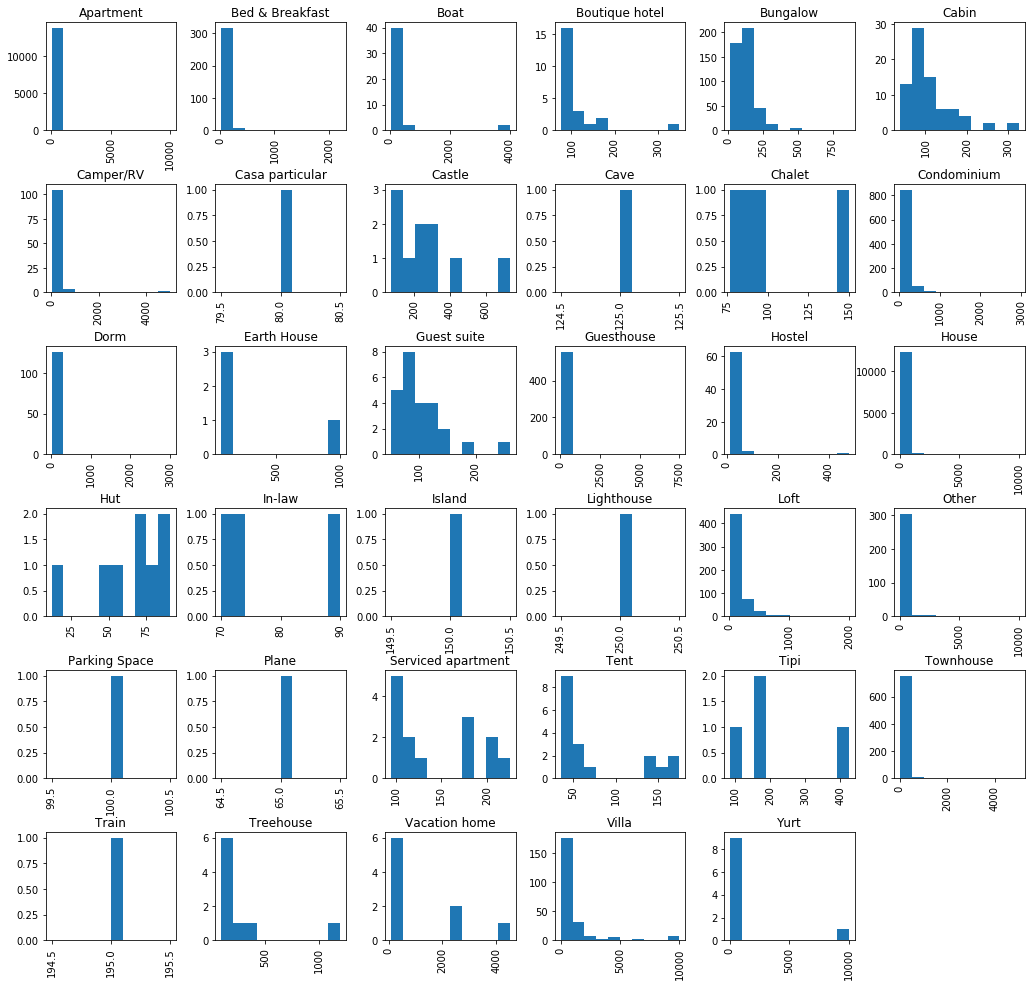

In [33]:
# Plot the different types of housing verses the price of rental
ax = cleaned_la_airbnbs.hist(column='price', by='property_type', figsize=(17, 17), bins = 10)

Check scatter plots of bedrooms and beds to see if there are outliers that might be throwing our model.

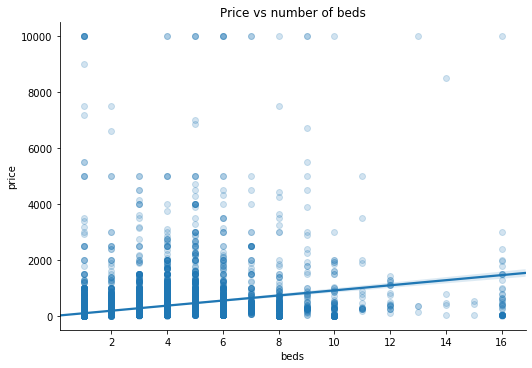

In [34]:
g = sns.lmplot(x = 'beds', y = 'price', data = cleaned_la_airbnbs, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of beds');

In [35]:
cleaned_la_airbnbs.loc[:, 'beds'].value_counts(ascending = True)

15.0        3
13.0        4
14.0        5
11.0       17
12.0       19
16.0       44
9.0        58
10.0       86
7.0       151
8.0       162
6.0       444
5.0       730
4.0      1677
3.0      3116
2.0      6915
1.0     17822
Name: beds, dtype: int64

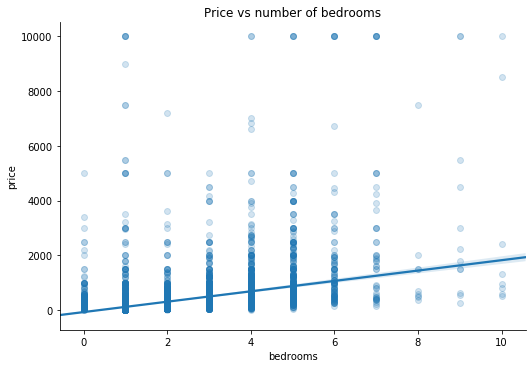

In [36]:
g = sns.lmplot(x = 'bedrooms', y = 'price', data = cleaned_la_airbnbs, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of bedrooms');

Seems to have a very housings with very high rental prices, as well as a few with almost 100 beds, which could be a mistake or very large mansions that could throw our model off.  Better to drop these rows to better fit our model.  Also going to create another dataframe where we drop 'review_scores_rating' instead of filling it to an average score.  

In [37]:
def find_outliers(dataseries):
    mean = np.mean(dataseries)
    std = np.std(dataseries)
    threshold = 1
    outliers = []
    
    for data in dataseries:
        z_score = (data - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(data)
    return(outliers)

In [38]:
prices = cleaned_la_airbnbs.loc[:, 'price']

In [39]:
price_outliers = find_outliers(prices)
print(min(price_outliers))

599.0


In [40]:
no_outliers_la_airbnb = cleaned_la_airbnbs[cleaned_la_airbnbs.loc[:, 'price'] <= min(price_outliers)]

In [41]:
no_outliers_la_airbnb.shape

(30188, 46)

In [42]:
cleaned_la_airbnbs.loc[:, 'beds'].value_counts()

1.0     17822
2.0      6915
3.0      3116
4.0      1677
5.0       730
6.0       444
8.0       162
7.0       151
10.0       86
9.0        58
16.0       44
12.0       19
11.0       17
14.0        5
13.0        4
15.0        3
Name: beds, dtype: int64

In [43]:
no_outliers_la_airbnb.loc[:, 'beds'].value_counts()

1.0     17721
2.0      6819
3.0      2930
4.0      1446
5.0       553
6.0       332
8.0       123
7.0       107
10.0       67
9.0        33
16.0       28
11.0       10
12.0       10
13.0        3
14.0        3
15.0        3
Name: beds, dtype: int64

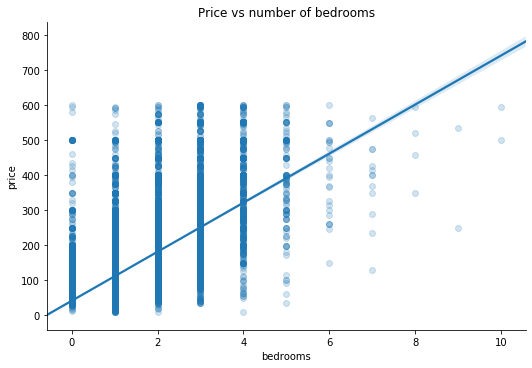

In [44]:
g = sns.lmplot(x = 'bedrooms', y = 'price', data = no_outliers_la_airbnb, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of bedrooms');

In [45]:
target_col = 'price'
y = cleaned_la_airbnbs.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms']
X = cleaned_la_airbnbs.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.17758969075407216
0.21592261000853807


In [46]:
no_outliers_la_airbnb.loc[:, 'review_scores_rating'].isna().sum()

6972

In [47]:
drop_rating_no_outliers_la_airbnb = no_outliers_la_airbnb.dropna(subset = ['review_scores_rating'])

In [48]:
no_outliers_la_airbnb.corr()

,id,host_id,host_listings_count,host_total_listings_count,zipcode,accommodates,bathrooms,bedrooms,beds,square_feet,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.000000,0.572399,0.048143,0.048143,0.070958,0.012591,0.010117,-0.011204,0.013129,-0.207995,...,-0.410301,-0.004283,-0.003282,0.021258,-0.029185,-0.039309,0.014096,0.044931,0.079613,0.195943
host_id,0.572399,1.000000,-0.011445,-0.011445,0.118319,-0.030844,0.008229,-0.019652,-0.005577,-0.182814,...,-0.233622,-0.039711,-0.044391,-0.022721,-0.040325,-0.056338,-0.026825,0.001651,-0.002208,0.145048
host_listings_count,0.048143,-0.011445,1.000000,1.000000,-0.009398,0.068668,0.072300,0.041174,0.081292,-0.091695,...,-0.016987,-0.082759,-0.067229,-0.051233,-0.067110,-0.057173,-0.043736,-0.073338,0.337772,-0.011869
host_total_listings_count,0.048143,-0.011445,1.000000,1.000000,-0.009398,0.068668,0.072300,0.041174,0.081292,-0.091695,...,-0.016987,-0.082759,-0.067229,-0.051233,-0.067110,-0.057173,-0.043736,-0.073338,0.337772,-0.011869
zipcode,0.070958,0.118319,-0.009398,-0.009398,1.000000,-0.005073,0.006156,0.052489,-0.001167,0.194102,...,-0.075032,0.013339,0.008496,0.017211,0.011677,-0.001112,0.001726,0.037730,-0.044083,-0.068367
accommodates,0.012591,-0.030844,0.068668,0.068668,-0.005073,1.000000,0.487434,0.692080,0.758834,0.442529,...,0.035585,-0.047979,-0.042082,-0.026714,-0.034123,-0.035605,-0.018373,-0.062628,0.110695,0.038746
bathrooms,0.010117,0.008229,0.072300,0.072300,0.006156,0.487434,1.000000,0.585041,0.521743,0.497226,...,-0.048014,-0.023037,-0.032964,-0.025601,-0.018460,-0.028733,-0.031011,-0.035192,0.183548,-0.061363
bedrooms,-0.011204,-0.019652,0.041174,0.041174,0.052489,0.692080,0.585041,1.000000,0.638238,0.519550,...,-0.074067,0.002191,-0.006660,-0.002962,-0.000702,-0.007562,0.009854,-0.017384,0.019661,-0.106827
beds,0.013129,-0.005577,0.081292,0.081292,-0.001167,0.758834,0.521743,0.638238,1.000000,0.411892,...,0.018940,-0.061773,-0.057204,-0.035081,-0.042255,-0.043872,-0.055383,-0.059931,0.219870,0.023792
square_feet,-0.207995,-0.182814,-0.091695,-0.091695,0.194102,0.442529,0.497226,0.519550,0.411892,1.000000,...,-0.077242,0.070127,-0.042495,0.006667,0.060563,0.086306,0.052420,-0.014002,-0.095243,-0.150401


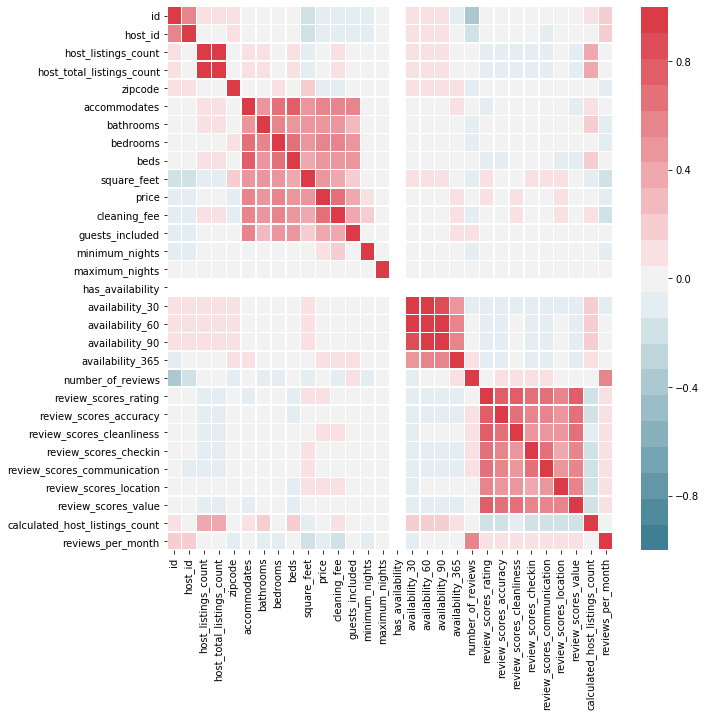

In [49]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(no_outliers_la_airbnb.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

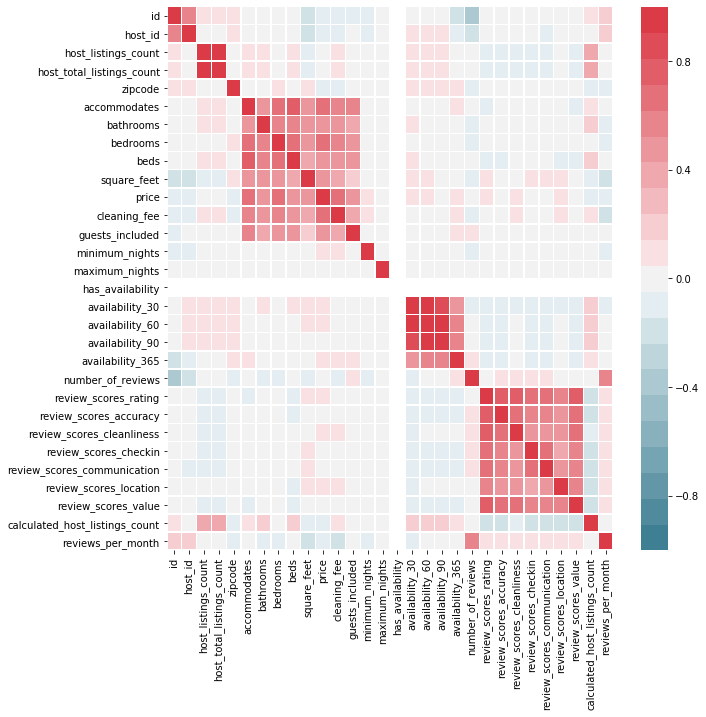

In [50]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(drop_rating_no_outliers_la_airbnb.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

In [51]:
target_col = 'price'
y = drop_rating_no_outliers_la_airbnb.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms', 'review_scores_rating']
X = drop_rating_no_outliers_la_airbnb.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.43688870624259957
0.4266269125736216


In [52]:
bedrooms = cleaned_la_airbnbs.loc[:, 'bedrooms']

In [53]:
bedrooms_outliers = find_outliers(bedrooms)
print(bedrooms_outliers)
print(len(bedrooms_outliers))

[5.0, 0.0, 0.0, 6.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 4.0, 7.0, 3.0, 0.0, 6.0, 3.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 3.0, 4.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 4.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 5.0, 3.0, 3.0, 0.0, 4.0, 0.0, 0.0, 3.0, 3.0, 3.0, 7.0, 0.0, 0.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 4.0, 3.0, 6.0, 0.0, 4.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 5.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 5.0, 0.0, 3.0, 0.0, 6.0, 5.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 6.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 0.0, 4.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0

In [54]:
beds = cleaned_la_airbnbs.loc[:, 'beds']

In [55]:
beds_outliers = find_outliers(beds)
print(beds_outliers)
print(len(beds_outliers))

[5.0, 4.0, 4.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 4.0, 7.0, 4.0, 4.0, 6.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 9.0, 8.0, 5.0, 4.0, 4.0, 6.0, 4.0, 4.0, 16.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 6.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 16.0, 4.0, 4.0, 11.0, 4.0, 4.0, 4.0, 15.0, 5.0, 4.0, 5.0, 16.0, 4.0, 7.0, 4.0, 4.0, 9.0, 15.0, 5.0, 4.0, 6.0, 4.0, 6.0, 4.0, 6.0, 4.0, 10.0, 4.0, 4.0, 4.0, 8.0, 7.0, 5.0, 4.0, 7.0, 4.0, 6.0, 4.0, 7.0, 5.0, 4.0, 6.0, 5.0, 9.0, 5.0, 5.0, 8.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 9.0, 4.0, 5.0, 5.0, 4.0, 5.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 7.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 8.0, 4.0, 4.0, 10.0, 8.0, 8.0, 10.0, 8.0, 12.0, 10.0, 8.0, 8.0, 10.0, 8.0, 8.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 8.0, 8.0, 8.0, 5.0, 5.0, 10.0, 8.0, 10.0, 10.0, 8.0, 10.0, 8.0, 8.0, 10.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 6.0, 10.0, 4.0, 10.0, 10.0, 10.0, 8.0, 8.0, 6.0, 8.0, 8.0, 6.0, 8.0, 

In [56]:
beds.value_counts()

1.0     17822
2.0      6915
3.0      3116
4.0      1677
5.0       730
6.0       444
8.0       162
7.0       151
10.0       86
9.0        58
16.0       44
12.0       19
11.0       17
14.0        5
13.0        4
15.0        3
Name: beds, dtype: int64

In [57]:
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, target_col, feature_cols):
    y = df.loc[:, target_col]
    X = df.loc[:, feature_cols]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    return(np.sqrt(mse))

In [58]:
print(train_test_rmse(cleaned_la_airbnbs, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(no_outliers_la_airbnb, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(drop_rating_no_outliers_la_airbnb, 'price', ['zipcode', 'bedrooms']))

426.03877954811435
77.66847264604579
71.05590521252189


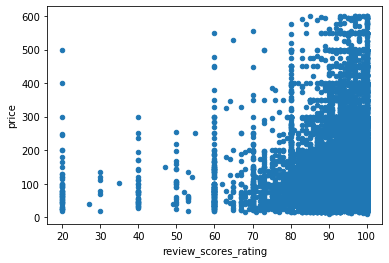

In [59]:
# Plot the resulting model on top of the corresponding scatterplot
ax = drop_rating_no_outliers_la_airbnb.plot(kind = 'scatter', x = 'review_scores_rating', y = 'price')
# ax.plot(drop_rating_no_outliers_la_airbnb.loc[:, 'review_scores_rating'], linreg.predict(X), c = 'r')

In [60]:
X.loc[:, 'review_log'] = X.loc[:, 'bedrooms'] ** 2

In [61]:
X.loc[:, 'review_log'].sample(10)

8266     1.0
5442     1.0
24156    0.0
11739    4.0
8625     9.0
9111     1.0
28577    9.0
9833     4.0
12740    1.0
7088     1.0
Name: review_log, dtype: float64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.45021211759888974
0.4378177654237134


In [63]:
# X_sorted = X[X[:, 0].argsort()]
X_sorted = X.sort_values(by = 'bedrooms')


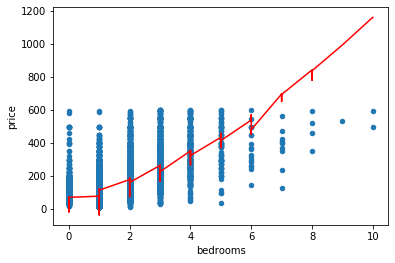

In [64]:
# Plot the resulting model on top of the corresponding scatterplot
ax = drop_rating_no_outliers_la_airbnb.plot(kind = 'scatter', x = 'bedrooms', y = 'price')
ax.plot(X_sorted.loc[:, 'bedrooms'], linreg.predict(X_sorted), c = 'r')

In [65]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2, include_bias = False)
pf.fit(X1)
X_poly = pf.transform(X1)

NameError: name 'X1' is not defined

In [ ]:
X_poly

In [ ]:
# Plot the resulting model on top of the corresponding scatterplot
ax = drop_rating_no_outliers_la_airbnb.plot(kind = 'scatter', x = 'bedrooms', y = 'price')
ax.plot(drop_rating_no_outliers_la_airbnb.loc[:, 'bedrooms'], linreg.predict(X), c = 'r')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

In [66]:
drop_rating_no_outliers_la_airbnb.shape

(23216, 46)

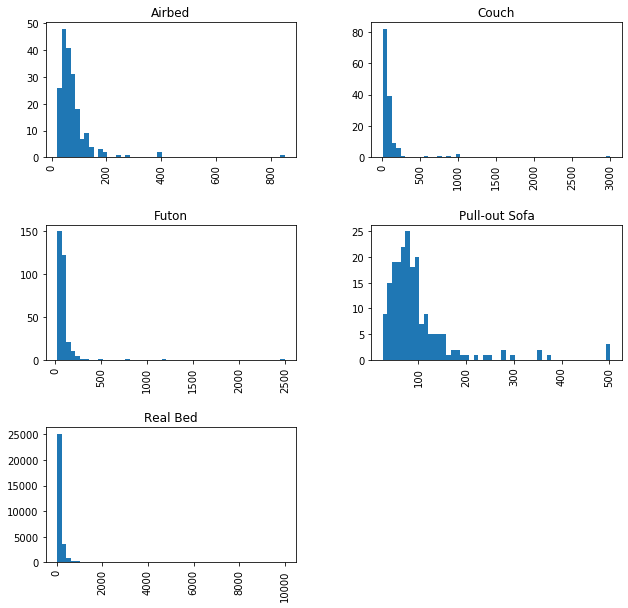

In [67]:
ax = cleaned_la_airbnbs.hist(column='price', by='bed_type', figsize=(10, 10), bins = 50)

In [68]:
test = pd.get_dummies(drop_rating_no_outliers_la_airbnb, columns = ['bed_type'], drop_first = True)

In [69]:
test = drop_rating_no_outliers_la_airbnb

In [70]:
test.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
     

In [71]:
target_col = 'price'
y = test.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms', 'review_scores_rating', 'calculated_host_listings_count']
X = test.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.44114916045589603
0.42986822142167513


In [72]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y)

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.8417599067448821
0.5462881853592754


In [73]:
kf = KFold(10, shuffle = True, random_state = 2)

grid = GridSearchCV(estimator = rfr,
                   param_grid = {},
                   return_train_score = True,
                   cv = kf)

grid.fit(X,y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(0.833274083769267, 0.5729617016447945)

In [74]:
test.loc[:, 'cleaning_fee'].isna().sum()

3929

In [170]:
test = test.dropna(subset = ['cleaning_fee'])

In [78]:
test.loc[:, 'test'] = test.loc[:, 'cleaning_fee'].transform(np.log)

In [77]:
test.loc[:, 'test'].sample(10)

15699    4.094345
21979    1.791759
6250     1.609438
10765    4.343805
7901     4.553877
14995    3.401197
28980    3.912023
18186    4.605170
28955    5.003946
24949    3.367296
Name: test, dtype: float64

In [80]:
for fee_index, fee_row in test.iterrows():
    if test.loc[fee_index, 'cleaning_fee'] == 0:
        test.drop(fee_index, inplace = True)

In [81]:
X_sorted = test.sort_values('test', ascending = True)

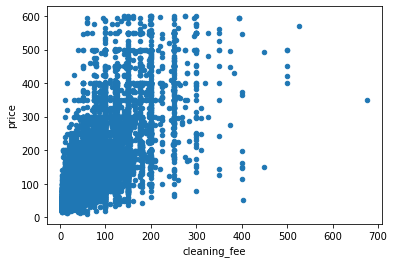

In [82]:
# Plot the resulting model on top of thecorresponding scatterplot
ax = test.plot(kind = 'scatter', x = 'cleaning_fee', y = 'price')
# ax.plot(X_sorted.loc[:, 'test'], linreg.predict(X_sorted), c = 'r')

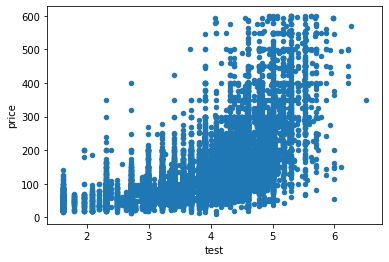

In [83]:
# Plot the resulting model on top of thecorresponding scatterplot
ax = test.plot(kind = 'scatter', x = 'test', y = 'price')
# ax.plot(test.loc[:, 'test'], linreg.predict(X_sorted), c = 'r')

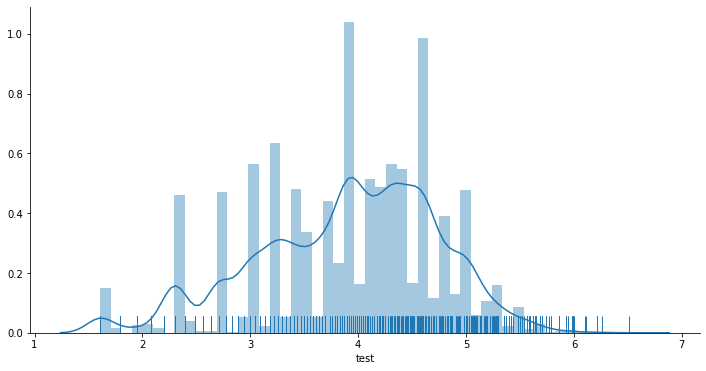

In [84]:
plt.figure(figsize=(12,6))
sns.distplot(test.test, rug=True, norm_hist = True)
sns.despine()
plt.show();

In [194]:
test.loc[:, 'price_test'] = test.loc[:, 'price'].transform(np.sqrt)

In [195]:
test.loc[:, ['price', 'price_test']]

,price,price_test
3,150.0,12.247449
4,30.0,5.477226
6,45.0,6.708204
7,56.0,7.483315
9,80.0,8.944272
10,120.0,10.954451
12,50.0,7.071068
15,55.0,7.416198
16,80.0,8.944272
17,79.0,8.888194


In [88]:
print(train_test_rmse(cleaned_la_airbnbs, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(no_outliers_la_airbnb, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(drop_rating_no_outliers_la_airbnb, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(test, 'price', ['bedrooms']))
print(train_test_rmse(test, 'price_test', ['bedrooms']))
print(train_test_rmse(test, 'price_test', ['zipcode', 'bedrooms']))

426.03877954811435
77.66847264604579
71.05590521252189
73.25314131306939
2.8671174539544073
2.804230190946382


In [89]:
kf = KFold(10, shuffle = True, random_state = 2)

grid = GridSearchCV(estimator = linreg,
                   param_grid = {},
                   return_train_score = True,
                   cv = kf)

grid.fit(X,y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(0.43274860274928206, 0.43212470415369814)

In [90]:
test.amenities[3]

'{TV,"Wireless Internet","Air conditioning",Pool,Kitchen,"Free parking on premises","Pets allowed",Breakfast,"Pets live on this property",Dog(s),"Hot tub","Indoor fireplace",Heating,"Family/kid friendly","Suitable for events",Washer,Dryer,"Smoke detector",Essentials,Shampoo,"24-hour check-in",Hangers}'

In [92]:
test.loc[:, 'amenities'] = test.loc[:, 'amenities'].str.replace("[{}]", "").str.replace('"', "")
test['amenities'].head()

3    TV,Wireless Internet,Air conditioning,Pool,Kit...
4    Internet,Wireless Internet,Kitchen,Free parkin...
6    Internet,Wireless Internet,Free parking on pre...
7    TV,Internet,Wireless Internet,Kitchen,Washer,D...
9    TV,Wireless Internet,Air conditioning,Kitchen,...
Name: amenities, dtype: object

In [93]:
test.loc[:, 'amenities'].head()

3    TV,Wireless Internet,Air conditioning,Pool,Kit...
4    Internet,Wireless Internet,Kitchen,Free parkin...
6    Internet,Wireless Internet,Free parking on pre...
7    TV,Internet,Wireless Internet,Kitchen,Washer,D...
9    TV,Wireless Internet,Air conditioning,Kitchen,...
Name: amenities, dtype: object

In [94]:
test.loc[:, 'amenities']

3        TV,Wireless Internet,Air conditioning,Pool,Kit...
4        Internet,Wireless Internet,Kitchen,Free parkin...
6        Internet,Wireless Internet,Free parking on pre...
7        TV,Internet,Wireless Internet,Kitchen,Washer,D...
9        TV,Wireless Internet,Air conditioning,Kitchen,...
10       TV,Internet,Wireless Internet,Air conditioning...
12       Internet,Wireless Internet,Pets live on this p...
15       TV,Wireless Internet,Kitchen,Pets live on this...
16       TV,Wireless Internet,Kitchen,Heating,Washer,Dr...
17       Cable TV,Internet,Wireless Internet,Kitchen,Fr...
19       TV,Internet,Wireless Internet,Kitchen,Free par...
20       TV,Internet,Wireless Internet,Free parking on ...
21       TV,Cable TV,Internet,Wireless Internet,Air con...
24       TV,Cable TV,Wireless Internet,Air conditioning...
25       Wireless Internet,Free parking on premises,Fam...
28       TV,Internet,Wireless Internet,Air conditioning...
30       Internet,Wireless Internet,Kitchen,Pets live o.

In [95]:
# test.loc[:, 'amenities'].map(lambda line: line.split(','))
amenities_list = {}
for line in test.loc[:, 'amenities']:
    for item in line.split(','):
        if item in amenities_list:
            amenities_list[item] +=1
        else:
            amenities_list[item] = 1
#     print(line.split(',')[1])
#     print(len(line.split(',')))

In [96]:
amenities_list

{'TV': 15311,
 'Wireless Internet': 18863,
 'Air conditioning': 13811,
 'Pool': 3972,
 'Kitchen': 17547,
 'Free parking on premises': 13011,
 'Pets allowed': 3459,
 'Breakfast': 2173,
 'Pets live on this property': 3555,
 'Dog(s)': 2358,
 'Hot tub': 3124,
 'Indoor fireplace': 4147,
 'Heating': 17464,
 'Family/kid friendly': 11649,
 'Suitable for events': 1260,
 'Washer': 14587,
 'Dryer': 14447,
 'Smoke detector': 16987,
 'Essentials': 17235,
 'Shampoo': 15181,
 '24-hour check-in': 7471,
 'Hangers': 14300,
 'Internet': 14500,
 'Fire extinguisher': 9372,
 'Lock on bedroom door': 3954,
 'Laptop friendly workspace': 12760,
 'translation missing: en.hosting_amenity_49': 5383,
 'translation missing: en.hosting_amenity_50': 6861,
 'Carbon monoxide detector': 13402,
 'First aid kit': 8853,
 'Cat(s)': 1127,
 'Safety card': 3673,
 'Hair dryer': 13024,
 'Iron': 12503,
 'Cable TV': 7743,
 'Buzzer/wireless intercom': 1968,
 'Private entrance': 2326,
 'Self Check-In': 3403,
 'Smartlock': 569,
 'Smok

In [97]:
listofTuples = sorted(amenities_list.items() ,  key=lambda x: x[1])

In [98]:
top_ten = sorted(amenities_list, key=amenities_list.get, reverse=True)[:5]

In [99]:
top_ten

['Wireless Internet', 'Kitchen', 'Heating', 'Essentials', 'Smoke detector']

In [101]:
test.loc[:, 'top_ten_amenitites'] = 0

In [102]:
for amenities_index, amenities_row in test.iterrows():
    for item in test.loc[amenities_index, 'amenities'].split(','):
        if item in top_ten:
            test.loc[amenities_index, 'top_ten_amenitites'] = 1
            break
#             print(item)
#             break
#         if item in amenities_list:
#             amenities_list[item] +=1

KeyboardInterrupt: 

In [103]:
test.loc[:, 'top_ten_amenitites'].value_counts()

0    13121
1     6161
Name: top_ten_amenitites, dtype: int64

In [188]:
test = test.dropna(subset = ['review_scores_rating'])
test.loc[:, 'cleaning_fee'] = test.loc[:, 'cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [189]:
test = test.dropna(subset = ['cleaning_fee'])

In [190]:
test.cleaning_fee.isna().sum()

0

In [203]:
test_dummies = pd.get_dummies(test, columns = ['bed_type'], drop_first = True)

In [204]:
test_dummies = pd.get_dummies(test_dummies, columns = ['room_type'], drop_first = True)

In [205]:
test_dummies.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'zipcode', 'is_location_exact',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'price_test', 'area_code', 'zip_area',
     

In [206]:
target_col = 'price'
y = test.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms', 'review_scores_rating', 'calculated_host_listings_count', 'beds']
X = test.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.4866660658971181
0.5074974761648431


In [224]:
target_col = 'price_test'
y = test_dummies.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms', 'review_scores_rating', 'calculated_host_listings_count', 'beds', 'bed_type_Couch', 'bed_type_Futon',
               'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'room_type_Private room', 'room_type_Shared room', 'area_code']
X = test_dummies.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.6431455555110471
0.6526568822490484


In [208]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9312095630963472
0.7145941283918431


In [209]:
kf = KFold(10, shuffle = True, random_state = 2)

grid = GridSearchCV(estimator = rfr,
                   param_grid = {},
                   return_train_score = True,
                   cv = kf)

grid.fit(X,y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(0.9303188998821037, 0.7174312661461195)

In [210]:
max_depth_range = list(range(1, 21))

In [211]:
from sklearn.metrics.scorer import make_scorer

def neg_rmse(y_true, y_pred):
    mse = np.square(y_true - y_pred).mean()
    return -np.sqrt(mse)

neg_rmse = make_scorer(neg_rmse)

In [212]:
from sklearn.tree import DecisionTreeRegressor

grid = GridSearchCV(estimator=DecisionTreeRegressor(),
                    param_grid={'max_depth': max_depth_range},
                    cv=kf,
                    return_train_score=True,
                    scoring=neg_rmse,
                   )
grid.fit(X_train, y_train)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(-3.2582171397109705, -3.252065419237874)

In [213]:
rmse_df = -pd.DataFrame(grid.cv_results_).loc[:, [f'split{i}_test_score' for i in range(10)]]
scores = rmse_df.sum(axis='columns')
scores

0     32.520654
1     27.836351
2     24.963108
3     24.193440
4     23.405811
5     22.941369
6     22.986390
7     23.466659
8     23.605145
9     24.174193
10    24.239159
11    24.882025
12    25.480548
13    26.039673
14    26.433147
15    26.921949
16    27.365946
17    27.691918
18    27.920699
19    28.066722
dtype: float64

In [214]:
scores.index = max_depth_range

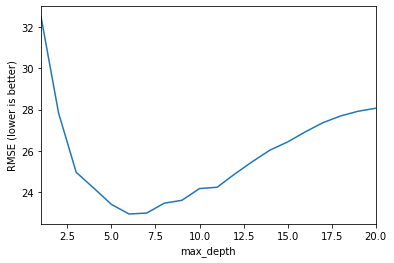

In [215]:
ax = scores.plot()
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

In [216]:
grid.best_score_, grid.best_params_

(-2.2941368757549796, {'max_depth': 6})

In [217]:
treereg = DecisionTreeRegressor(max_depth=8, random_state=1)
treereg.fit(X_train, y_train)
print(treereg.score(X_train, y_train))
print(treereg.score(X_test, y_test))

0.7591607229793847
0.6773874127281946


In [218]:
kf = KFold(10, shuffle=True, random_state=1)

grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=200, random_state=1),
                    param_grid={'max_depth': max_depth_range},
                    cv=kf,
                    return_train_score=True,
                    scoring=neg_rmse,
                   )
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
  

In [219]:
rmse_df = -pd.DataFrame(grid.cv_results_).loc[:, [f'split{i}_test_score' for i in range(10)]]
scores = rmse_df.sum(axis='columns')
scores.index = max_depth_range

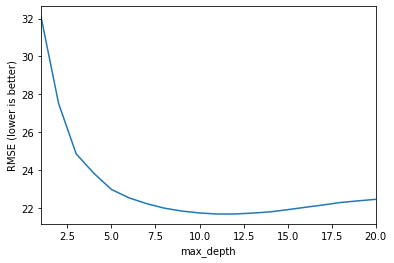

In [220]:
ax = scores.plot()
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

In [221]:
grid.best_score_, grid.best_params_

(-2.1705531346998677, {'max_depth': 11})

In [222]:
rfreg = RandomForestRegressor(
    n_estimators=200,
    max_depth=grid.best_params_['max_depth'],
    oob_score=True,
    random_state=1
)
rfreg.fit(X_train, y_train)
print(rfreg.score(X_train, y_train))
print(rfreg.score(X_test, y_test))

0.8339061234090173
0.7277955702007878


In [156]:
one_bed = test[test.loc[:, 'beds'] == 1]

In [157]:
two_beds = test[test.loc[:, 'beds'] == 2]

In [159]:
target_col = 'price'
y = one_bed.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms', 'review_scores_rating', 'cleaning_fee', 'test', 'calculated_host_listings_count']
X = one_bed.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
target_col = 'price_test'
y = two_beds.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms', 'review_scores_rating', 'cleaning_fee', 'test', 'calculated_host_listings_count']
X = two_beds.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

In [112]:
one_bed.loc[:, 'price'].mean()

93.04033041788144

In [113]:
two_beds.loc[:, 'price'].mean()

146.7010647010647

In [180]:
test = cleaned_la_airbnbs.drop('amenities', axis = 'columns')

(31253, 45)

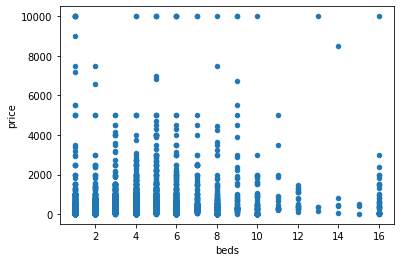

In [181]:
test.plot(kind = 'scatter', x = 'beds', y = 'price')
test.shape

In [182]:
bed_types_array = ['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']

for bed_type in bed_types_array:
    for _ in range(1, 17):
        test_outliers = test[(test.bed_type == bed_type) & (test.beds == _)].price
        if len(test_outliers) > 1: 
            test_outliers = find_outliers(test_outliers)
            if len(test_outliers) >= 1:
                test.drop(test[(test.bed_type == bed_type) & (test.beds == _) & (test.price >= min(test_outliers))].index, inplace = True)
        elif len(test_outliers) == 1:
                test.drop(test[(test.bed_type == bed_type) & (test.beds == _) & (test.price >= min(test_outliers))].index, inplace = True)

(30047, 45)

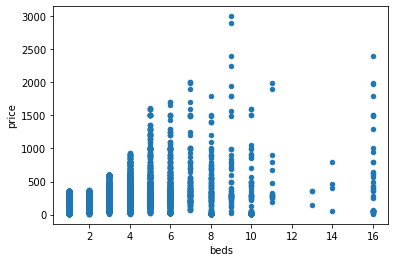

In [183]:
test.plot(kind = 'scatter', x = 'beds', y = 'price')
test.shape

In [118]:
print(test[(test.bed_type == 'Real Bed') & (test.beds == 1)].loc[:, 'price'].sort_values())
test_outliers_df = test[(test.bed_type == 'Real Bed') & (test.beds == 1)]
test_outliers = test[(test.bed_type == 'Real Bed') & (test.beds == 1)].price

28687     10.0
22308     10.0
21997     10.0
22284     10.0
19582     12.0
8400      12.0
13045     13.0
13719     15.0
13655     15.0
24575     15.0
25892     15.0
13689     15.0
3042      15.0
7981      15.0
25213     16.0
25214     16.0
25274     16.0
21785     16.0
25221     16.0
10537     16.0
25887     16.0
10527     16.0
18698     17.0
19505     17.0
21754     17.0
21384     17.0
23927     17.0
9600      18.0
21830     18.0
9795      18.0
         ...  
4368     350.0
22458    350.0
9274     350.0
27976    350.0
29109    350.0
7377     350.0
8        350.0
11200    350.0
12517    350.0
26194    350.0
22772    350.0
8329     350.0
2306     350.0
10411    350.0
14243    350.0
2217     350.0
11508    350.0
2694     350.0
25922    350.0
11820    350.0
21282    350.0
1524     350.0
27536    350.0
23943    350.0
1525     350.0
12833    350.0
22137    350.0
25149    350.0
4558     350.0
2617     350.0
Name: price, Length: 16887, dtype: float64


In [119]:
test_outliers = find_outliers(test_outliers)
print(test_outliers)
print(min(test_outliers))

[30.0, 35.0, 350.0, 32.0, 39.0, 24.0, 22.0, 24.0, 26.0, 24.0, 24.0, 26.0, 25.0, 26.0, 158.0, 25.0, 23.0, 23.0, 35.0, 25.0, 26.0, 35.0, 35.0, 28.0, 39.0, 40.0, 38.0, 34.0, 38.0, 39.0, 32.0, 158.0, 40.0, 39.0, 28.0, 35.0, 39.0, 35.0, 42.0, 35.0, 40.0, 40.0, 35.0, 39.0, 35.0, 35.0, 27.0, 33.0, 40.0, 40.0, 40.0, 30.0, 30.0, 42.0, 39.0, 34.0, 41.0, 40.0, 39.0, 33.0, 33.0, 33.0, 34.0, 33.0, 40.0, 40.0, 27.0, 40.0, 200.0, 29.0, 41.0, 350.0, 198.0, 200.0, 34.0, 150.0, 24.0, 175.0, 35.0, 150.0, 37.0, 40.0, 42.0, 28.0, 38.0, 30.0, 37.0, 150.0, 32.0, 42.0, 41.0, 144.0, 153.0, 40.0, 40.0, 35.0, 40.0, 40.0, 155.0, 185.0, 150.0, 245.0, 300.0, 185.0, 20.0, 20.0, 20.0, 20.0, 20.0, 30.0, 20.0, 35.0, 35.0, 20.0, 20.0, 20.0, 20.0, 200.0, 30.0, 200.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 28.0, 200.0, 200.0, 40.0, 20.0, 20.0, 20.0, 20.0, 33.0, 20.0, 20.0, 20.0, 20.0, 42.0, 20.0, 20.0, 20.0, 20.0, 200.0, 36.0, 170.0, 27.0, 29.0, 26.0, 24.0, 37.0, 23.0, 21.0, 40.0, 35.0, 29.0, 30.0, 38.0, 33.0, 199.0, 36.0, 3

In [120]:
test.drop(test[(test.bed_type == 'Real Bed') & (test.beds == 1) & (test.price > min(test_outliers))].index, inplace = True)
# test = test[test.loc[:, 'price'] < min(test_outliers)]

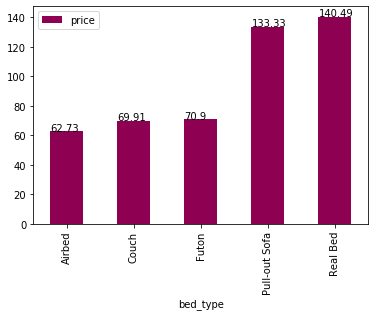

In [186]:
ax = test.loc[:, ['price', 'bed_type']].groupby('bed_type').mean().plot(kind = 'bar', colormap = 'PiYG')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

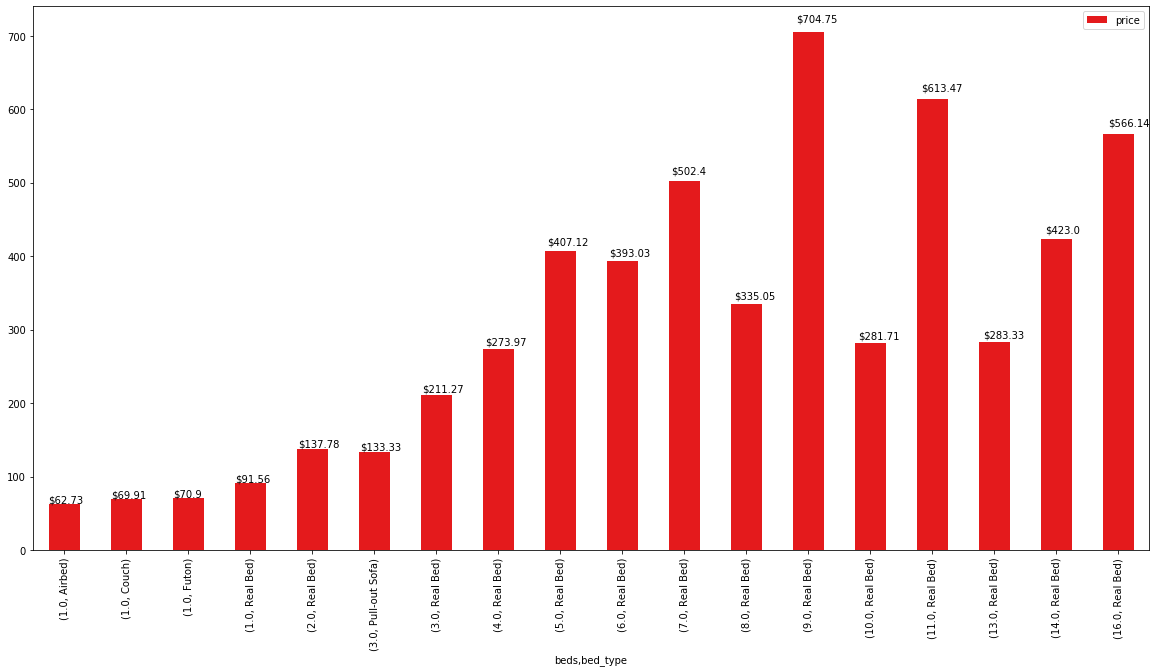

In [185]:
ax = test.loc[:, ['price', 'beds', 'bed_type']].groupby(['beds', 'bed_type']).mean().plot(kind = 'bar', colormap = 'Set1', figsize = (20, 10))
for p in ax.patches:
    ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.02))

In [129]:
# ax = test.loc[:, ['price', 'beds', 'bed_type']].groupby(['beds', 'bed_type']).sum().plot(kind = 'hist', colormap = 'Set2', figsize = (20, 10))
# for p in ax.patches:
#     ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.02))
test.loc[:, ['price', 'beds', 'bed_type']].groupby(['beds', 'bed_type']).sum()

price
beds bed_type                
1.0  Airbed           10476.0
     Couch             8739.0
     Futon            19071.0
     Real Bed       1546240.0
2.0  Real Bed        901600.0
3.0  Pull-out Sofa      800.0
     Real Bed        618607.0
4.0  Real Bed        424935.0
5.0  Real Bed        275215.0
6.0  Real Bed        161928.0
7.0  Real Bed         68829.0
8.0  Real Bed         50592.0
9.0  Real Bed         35942.0
10.0 Real Bed         22255.0
11.0 Real Bed          9202.0
13.0 Real Bed           850.0
14.0 Real Bed          1692.0
16.0 Real Bed         23778.0

/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20122 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36842 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23572 missing from current font.
  font.set_

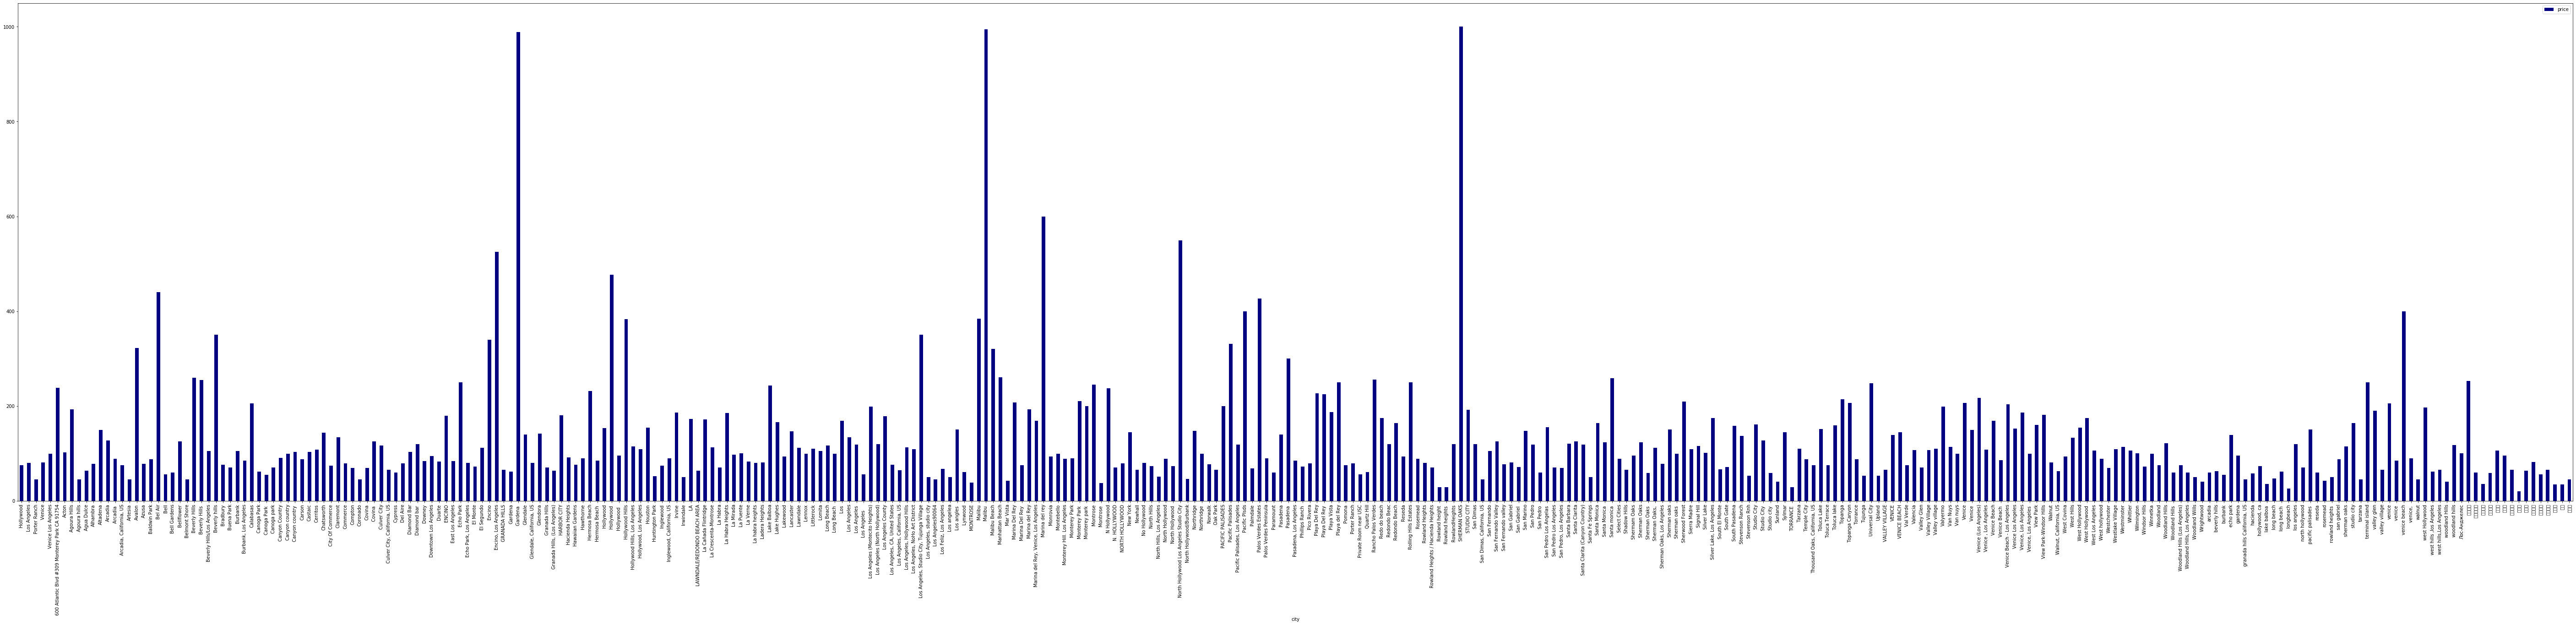

In [130]:
ax =test.loc[:, ['price', 'city']].groupby('city').mean().plot(kind = 'bar', colormap = 'jet', figsize = (100, 20))

In [131]:
central_area = pd.read_csv('../data/zips/area_codes/213.csv', header = None)[0].tolist()

In [132]:
westside_area = pd.read_csv('../data/zips/area_codes/310.csv', header = None)[0].tolist()

In [133]:
la_area = pd.read_csv('../data/zips/area_codes/323.csv', header = None)[0].tolist()

In [134]:
inland_area = pd.read_csv('../data/zips/area_codes/562.csv', header = None)[0].tolist()

In [135]:
pasadena_area = pd.read_csv('../data/zips/area_codes/626.csv', header = None)[0].tolist()

In [136]:
bakersfield_area = pd.read_csv('../data/zips/area_codes/661.csv', header = None)[0].tolist()

In [137]:
sfv_area = pd.read_csv('../data/zips/area_codes/818.csv', header = None)[0].tolist()

In [138]:
san_bernardino_area = pd.read_csv('../data/zips/area_codes/909.csv', header = None)[0].tolist()

In [201]:
count_central = 0
count_westside = 0
count_la = 0
count_inland = 0
count_pasadena = 0
count_bakersfield = 0
count_sfv = 0
count_san_bernardino = 0
count_other = 0
for zip_index, zip_row in test.iterrows():
    if test.loc[zip_index, 'zipcode'] in central_area:
        test.loc[zip_index, 'area_code'] = 213
        test.loc[zip_index, 'zip_area'] = 'Central Downtown'
        count_central += 1
    elif test.loc[zip_index, 'zipcode'] in westside_area:
        test.loc[zip_index, 'area_code'] = 310
        test.loc[zip_index, 'zip_area'] = 'West Los Angeles'
        count_westside += 1
    elif test.loc[zip_index, 'zipcode'] in la_area:
        test.loc[zip_index, 'area_code'] = 323
        test.loc[zip_index, 'zip_area'] = 'Los Angeles'
        count_la += 1
    elif test.loc[zip_index, 'zipcode'] in inland_area:
        test.loc[zip_index, 'area_code'] = 562
        test.loc[zip_index, 'zip_area'] = 'Inland Empire'
        count_inland += 1
    elif test.loc[zip_index, 'zipcode'] in pasadena_area:
        test.loc[zip_index, 'area_code'] = 626
        test.loc[zip_index, 'zip_area'] = 'Pasadena'
        count_pasadena += 1
    elif test.loc[zip_index, 'zipcode'] in bakersfield_area:
        test.loc[zip_index, 'area_code'] = 661
        test.loc[zip_index, 'zip_area'] = 'Bakersfield'
        count_pasadena += 1
    elif test.loc[zip_index, 'zipcode'] in sfv_area:
        test.loc[zip_index, 'area_code'] = 818
        test.loc[zip_index, 'zip_area'] = 'San Fernando Valley'
        count_sfv += 1
    elif test.loc[zip_index, 'zipcode'] in san_bernardino_area:
        test.loc[zip_index, 'area_code'] = 909
        test.loc[zip_index, 'zip_area'] = 'San Bernardino'
        count_san_bernardino += 1
    else:
        test.loc[zip_index, 'area_code'] = 0
        test.loc[zip_index, 'zip_area'] = 'Other'
        count_other += 1
print(count_central + count_westside + count_la + count_inland + count_pasadena + count_bakersfield + count_sfv + count_san_bernardino + count_other)

19214


In [202]:
test.sample(5)

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,city,...,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_test,area_code,zip_area
20505,8814009,30745513,2015-04-07,t,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,Redondo Beach,Redondo Beach,...,9.0,10.0,f,moderate,f,1,5.55,9.949874,310.0,West Los Angeles
9498,9739576,50251114,2015-12-01,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",f,Encino,"Encino, Los Angeles",...,10.0,9.0,f,moderate,f,1,1.60,22.912878,818.0,San Fernando Valley
11988,4190907,6529781,2013-05-22,f,7.0,7.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Highland Park,Los Angeles,...,9.0,10.0,f,moderate,f,7,2.11,7.071068,323.0,Los Angeles
23902,9750131,1008105,2011-08-23,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Silver Lake,Los Angeles,...,8.0,10.0,f,strict,f,1,0.06,8.062258,323.0,Los Angeles
23358,6513973,23118355,2014-10-29,t,44.0,44.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,Sherman Oaks,Los Angeles,...,10.0,10.0,f,strict,f,28,0.57,15.874508,818.0,San Fernando Valley


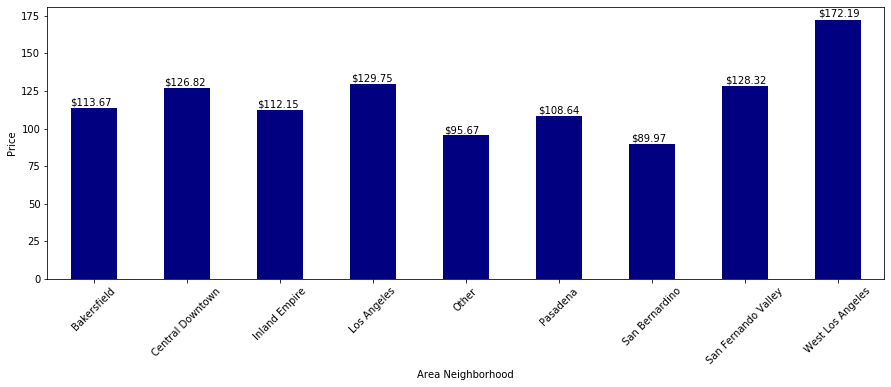

In [142]:
ax =test.loc[:, ['price', 'zip_area']].groupby('zip_area').mean().plot(kind = 'bar', colormap = 'jet', figsize = (15, 5), legend = False, rot = 45)
for p in ax.patches:
    ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.015))
    ax.set_xlabel('Area Neighborhood')
    ax.set_ylabel('Price')

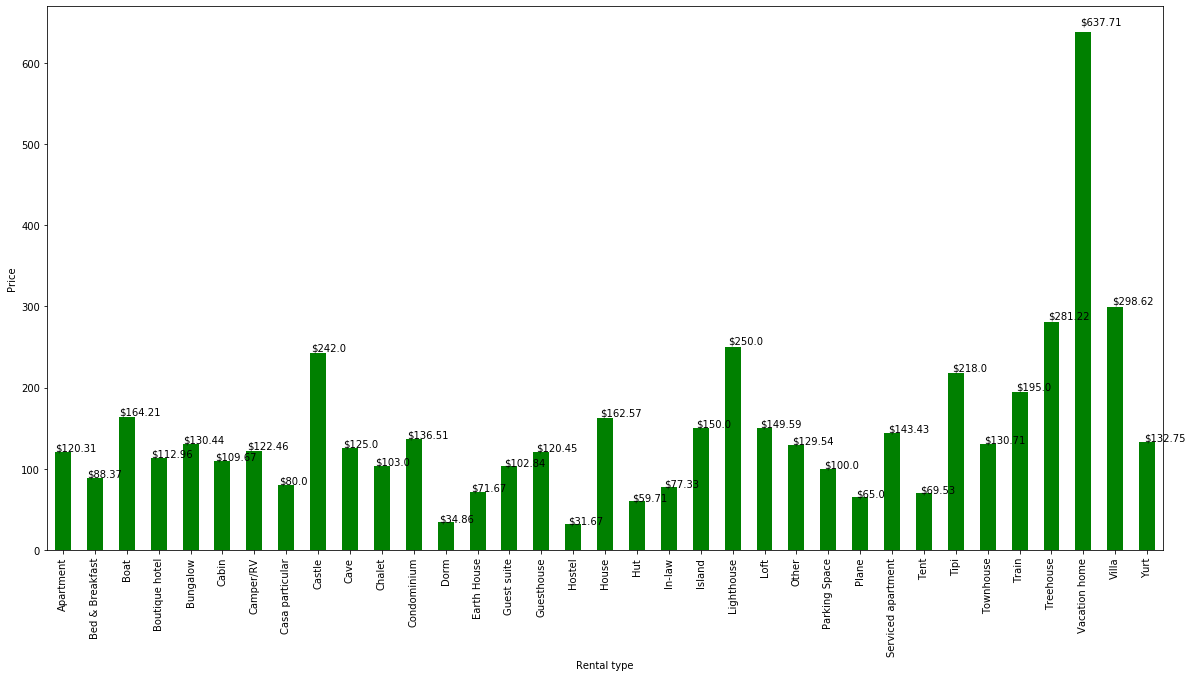

In [143]:
ax =test.loc[:, ['price', 'property_type']].groupby('property_type').mean().plot(kind = 'bar', color = 'g', figsize = (20, 10), legend = False)
for p in ax.patches:
    ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.015))
    ax.set_xlabel('Rental type')
    ax.set_ylabel('Price')

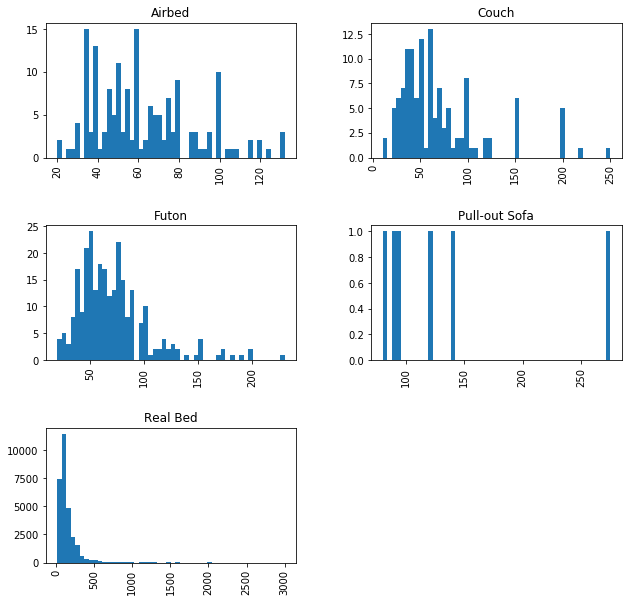

In [144]:
ax = test.hist(column='price', by='bed_type', figsize=(10, 10), bins = 50)

In [145]:
ax = test.hist(column='price_test', by='bed_type', figsize=(10, 10), bins = 50)

KeyError: 'Column not found: price_test'

In [146]:
y_predict = rfreg.predict(X_train)

NameError: name 'rfreg' is not defined

In [ ]:
pd.DataFrame({'feature': feature_cols, 'importance': rfreg.feature_importances_})

In [147]:
g = sns.lmplot(x = 'beds', y = 'price_test', data = test, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of bedrooms');

KeyError: "['price_test'] not in index"